In [1]:
#%matplotlib notebook
import mat73
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.metrics import mutual_info_score

In [37]:
names = ["Krebs", "Waksman", "Robbins"]
ID = 2
dataset = loadmat("../../Data/source/{}withFaces_KS2.mat".format(names[ID]))

In [38]:
activity = dataset["stall"]
regIDs = dataset["brainLoc"]
regLbs = dataset["areaLabels"].flatten()
regLbs = [regLbs[i][0] for i in range(regLbs.size)]
np.unique(regIDs)

array([ 2,  3,  7,  8,  9, 10, 11, 12], dtype=uint8)

In [26]:
def umap_reduce(st, n_neighbors=15, min_dist=0.1, n_components=2, metric="correlation"):
    mapper = umap.UMAP(
        n_neighbors = n_neighbors,
        min_dist = min_dist,
        n_components = n_components,
        metric = metric
    )
    
    return mapper.fit_transform(st)

In [27]:
def umap_plot(id, dim, embedding, regids):    
    fig = plt.figure(figsize=(15, 12))
    
    if dim == 2:
        ax = fig.add_subplot()
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=regids, s=8)
    else:
        ax = fig.add_subplot(projection="3d")
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=regids, s=8)
    
    unq_regids = np.unique(regids) - 1
    temp, _ = scatter.legend_elements()
    print(list(map(lambda x: regLbs[x], unq_regids)))
    legend = ax.legend(temp, list(map(lambda x: regLbs[x], unq_regids)), loc="upper left", prop={"size":14}, markerscale=2, bbox_to_anchor=(1, 1))
    ax.add_artist(legend)
    if dim == 3:
        ax.view_init(elev=30, azim=120)
    #plt.title(names[id], fontsize=30)
    fig.savefig("../../Plots/umap_{}.png".format(names[id]), dpi=300, bbox_inches="tight")

In [28]:
corr = mat73.loadmat("../../Data/save/M{}_cor.mat".format(ID+1))

In [29]:
res = umap_reduce(corr["cor"], 5, 0.1, 2, "cosine")

['FrMoCtx', 'SomMoCtx', 'V1', 'CP', 'LS', 'HPF', 'TH', 'SC', 'MB']


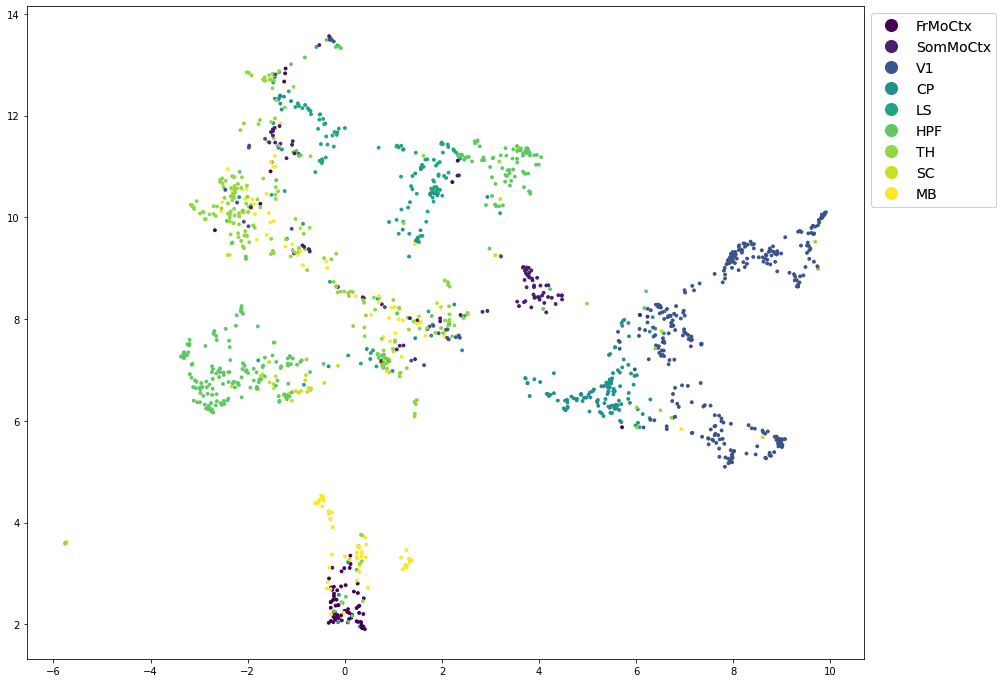

In [23]:
umap_plot(ID, 2, res, regIDs)

ValueError: 'c' argument has 2677 elements, which is inconsistent with 'x' and 'y' with size 2688.

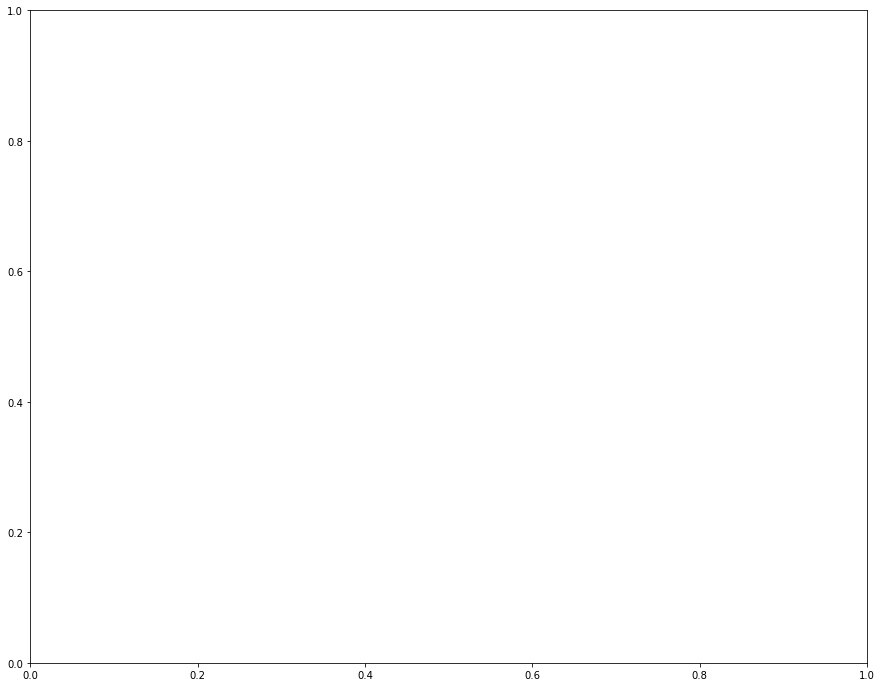

In [31]:
umap_plot(ID, 2, res, regIDs)

['FrMoCtx', 'SomMoCtx', 'RSP', 'CP', 'LS', 'LH', 'HPF', 'TH']


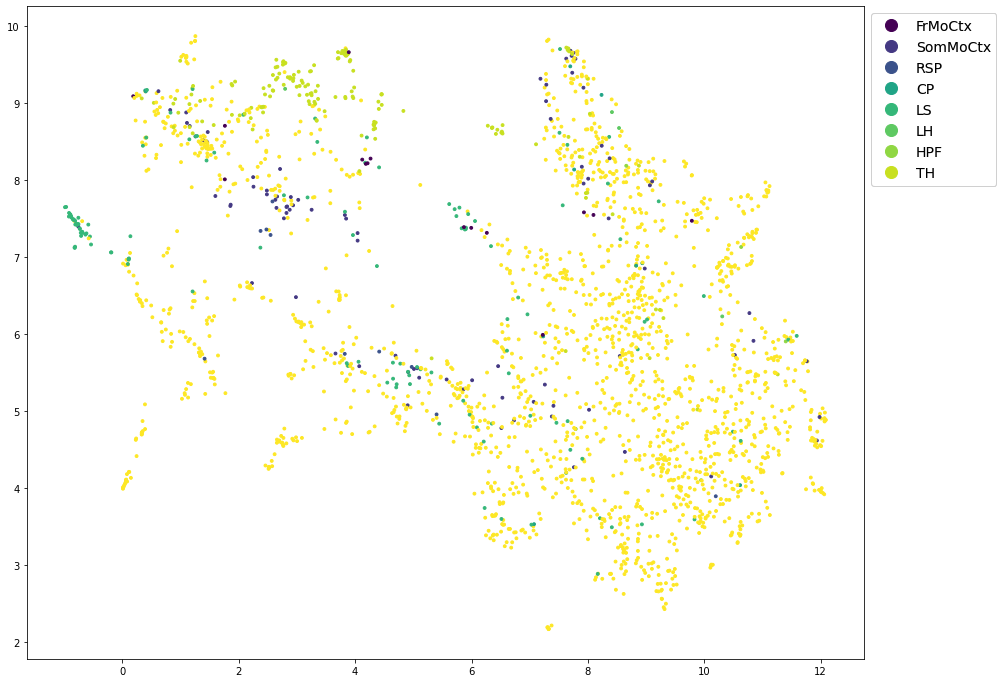

In [176]:
umap_plot(ID, DIM, res, regIDs)

In [39]:
res = umap_reduce(activity, 5, 0.1, 2, "cosine")

['FrMoCtx', 'SomMoCtx', 'V1', 'CP', 'LS', 'HPF', 'TH', 'SC', 'MB']


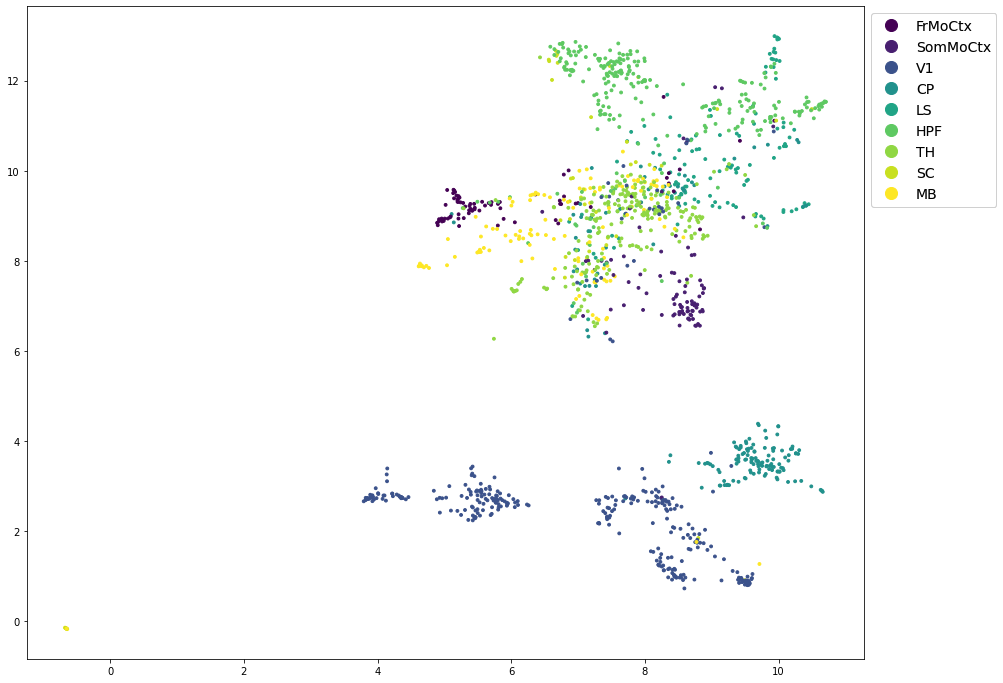

In [18]:
umap_plot(ID, 2, res, regIDs)

['FrCtx', 'FrMoCtx', 'SomMoCtx', 'SSCtx', 'V1', 'V2', 'RSP', 'LS', 'HPF', 'TH', 'SC', 'MB']


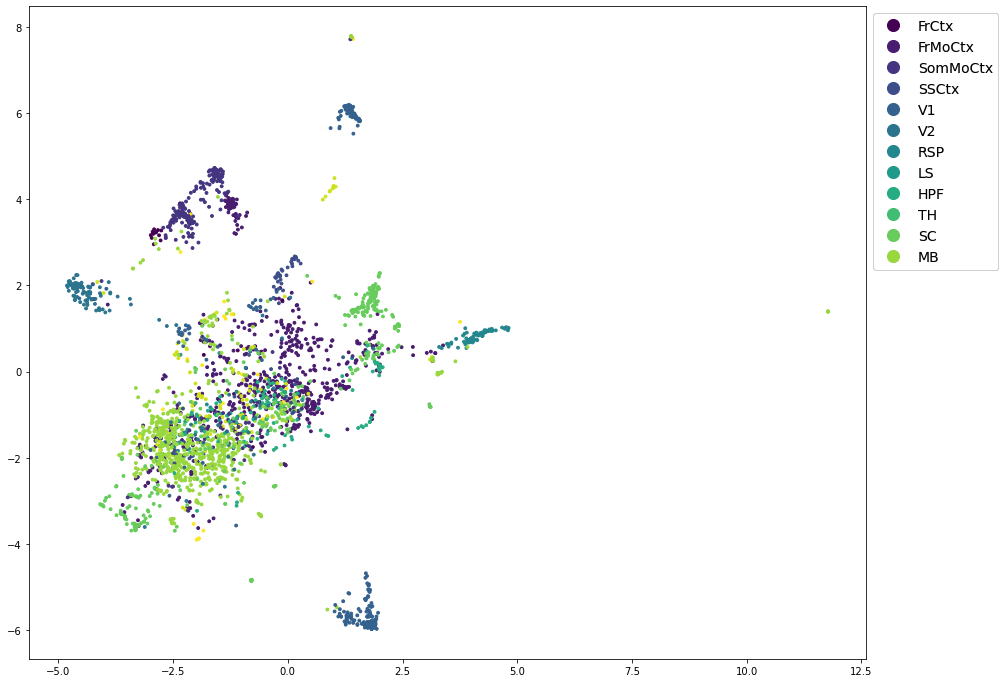

In [36]:
umap_plot(ID, 2, res, regIDs)

['FrMoCtx', 'SomMoCtx', 'RSP', 'CP', 'LS', 'LH', 'HPF', 'TH']


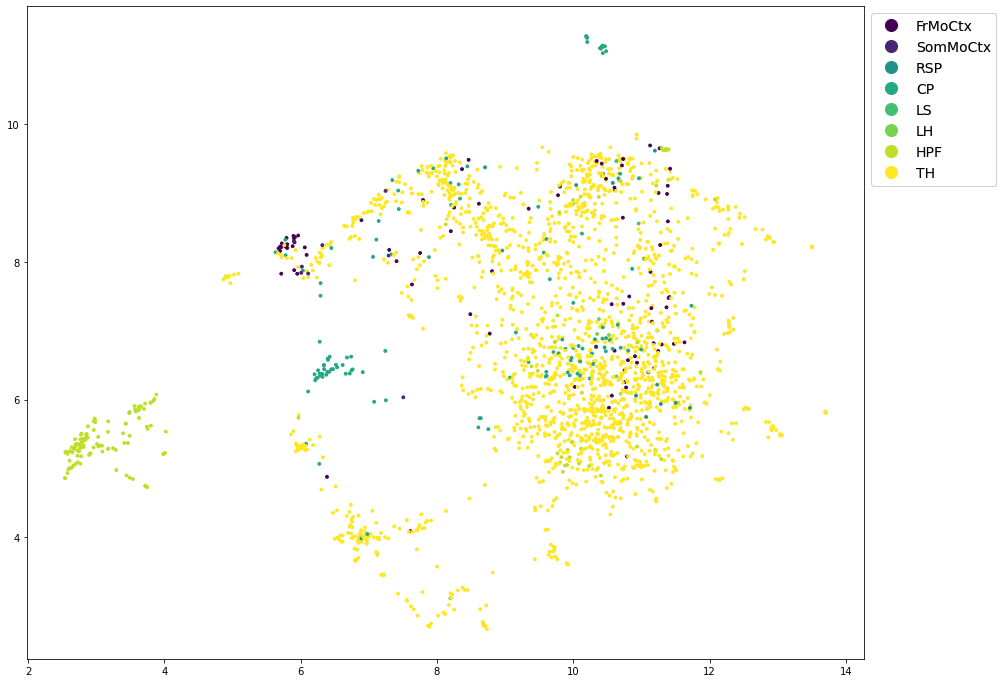

In [40]:
umap_plot(ID, 2, res, regIDs)

In [4]:
embedding = umap.UMAP(metric="correlation", output_metric="haversine").fit_transform(activity)

In [5]:
x = np.sin(embedding[:, 0]) * np.cos(embedding[:, 1])
y = np.sin(embedding[:, 0]) * np.sin(embedding[:, 1])
z = np.cos(embedding[:, 0])

<IPython.core.display.Javascript object>


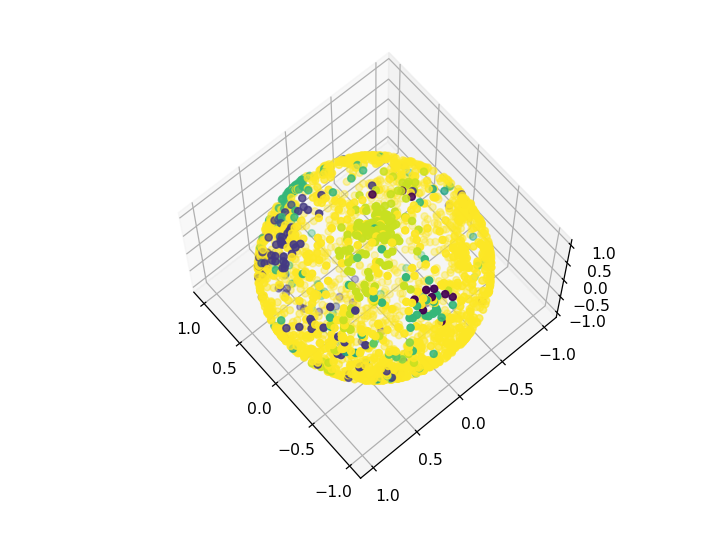

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=regIDs)

In [197]:
pacors = mat73.loadmat("../../Data/save/PACFs.mat")

In [200]:
mapper = umap.UMAP(metric="correlation", n_neighbors=5).fit(pacors[names[ID]].T)

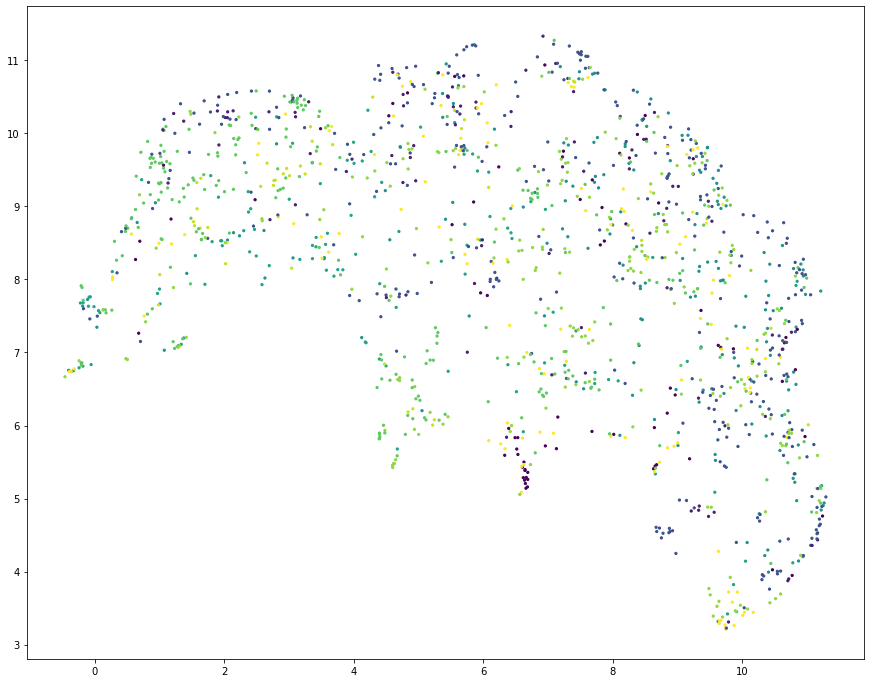

In [201]:
plt.figure(figsize=(15, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=5, c=regIDs)

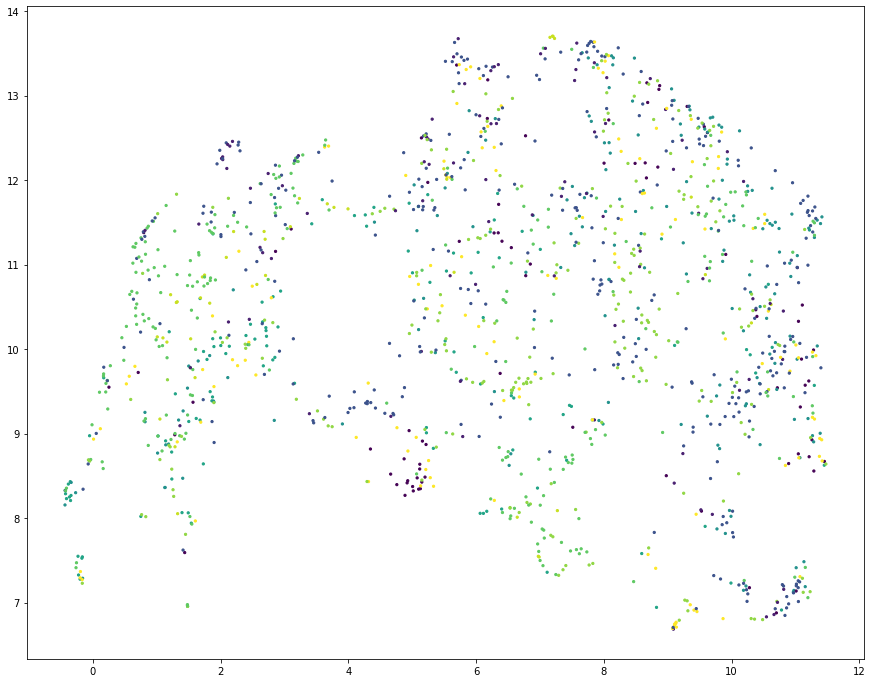

In [199]:
plt.figure(figsize=(15, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=5, c=regIDs)

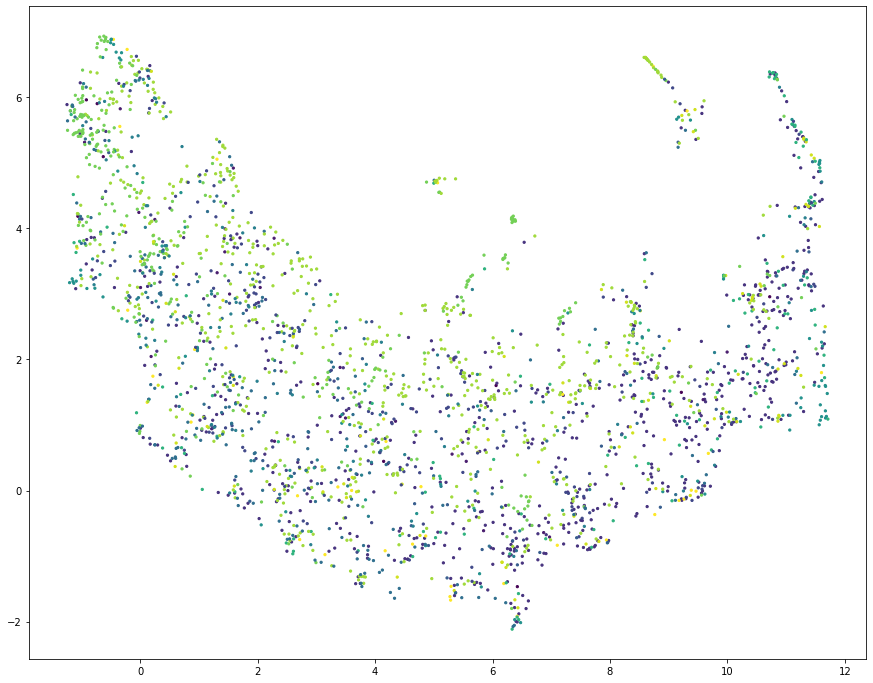

In [192]:
plt.figure(figsize=(15, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=5, c=regIDs)

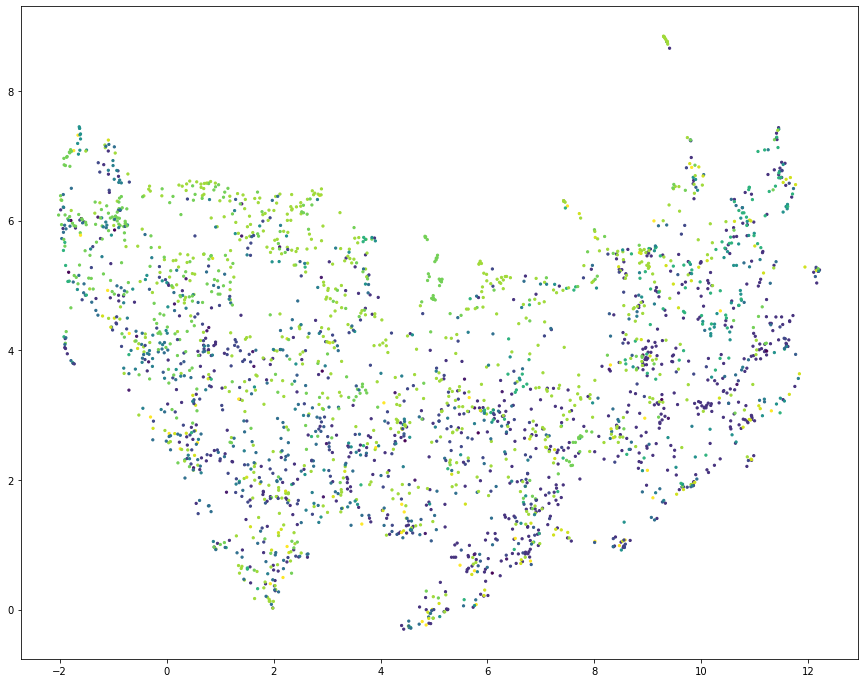

In [194]:
plt.figure(figsize=(15, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=5, c=regIDs)

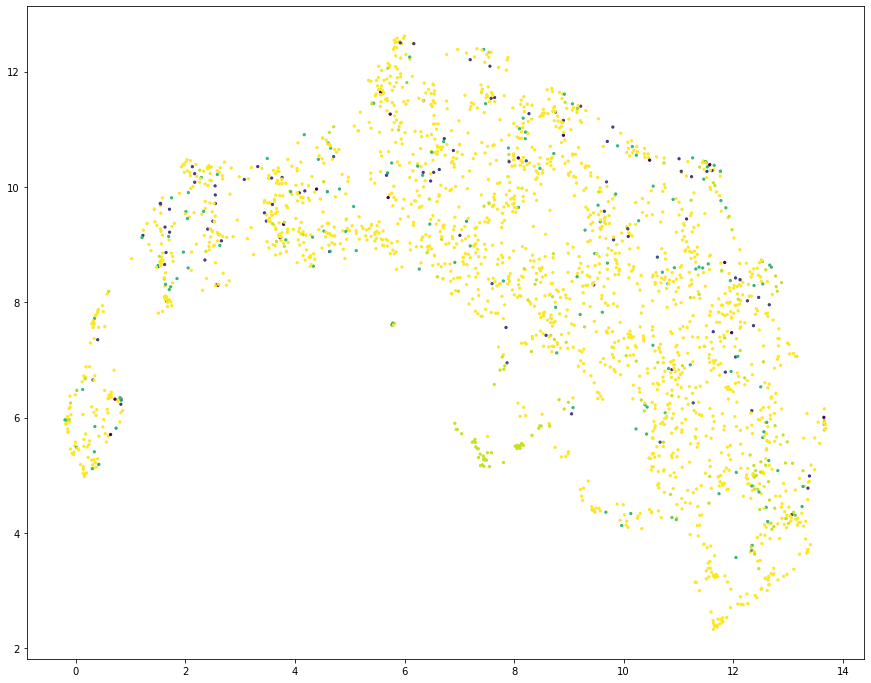

In [186]:
plt.figure(figsize=(15, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=5, c=regIDs)

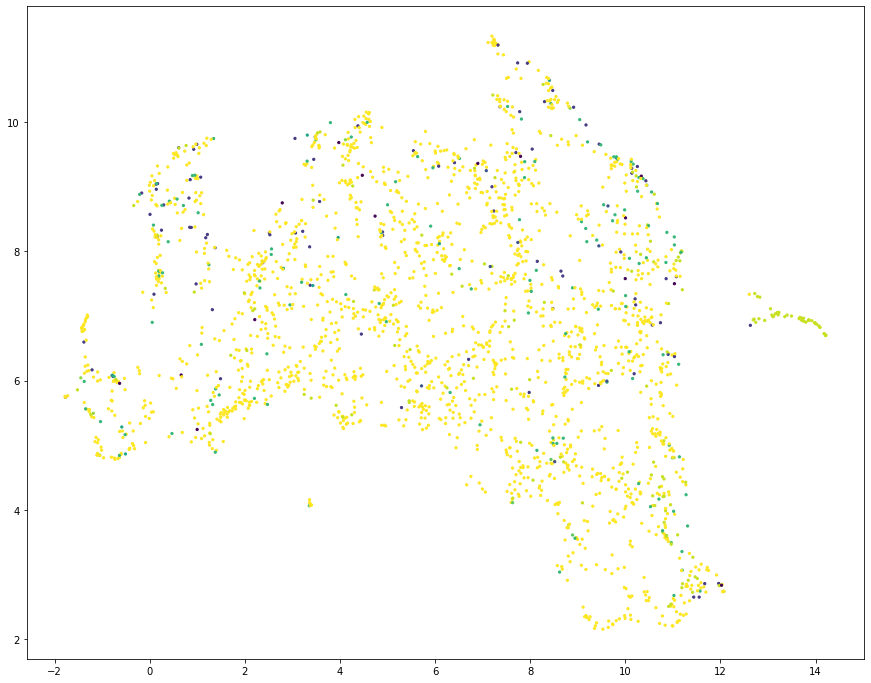

In [184]:
plt.figure(figsize=(15, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=5, c=regIDs)